Total good matches = 80
Outliers (mask == 0) = 5


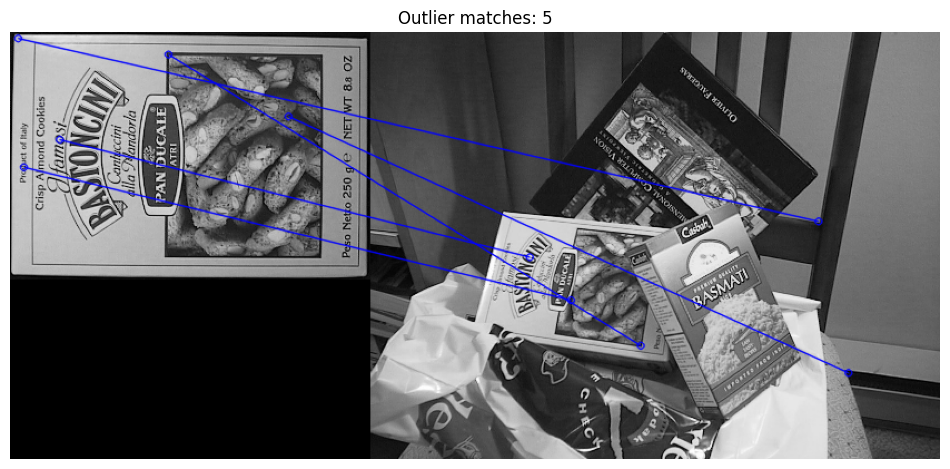

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('Box.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('Box_In_Scene.png', cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
matches_knn = bf.knnMatch(des1, des2, k=2)

good = []
for m, n in matches_knn:
    if m.distance < 0.75 * n.distance:
        good.append(m)

if len(good) < 4:
    print("Not enough good matches to compute a homography.")
else:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    outlier_matches = []
    for i, val in enumerate(mask):
        if val == 0:
            outlier_matches.append(good[i])

    print(f"Total good matches = {len(good)}")
    print(f"Outliers (mask == 0) = {len(outlier_matches)}")

    outlier_visual = cv2.drawMatches(
        img1,
        kp1,
        img2,
        kp2,
        outlier_matches,
        None,
        matchColor=(0, 0, 255),
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )

    plt.figure(figsize=(12, 6))
    plt.imshow(outlier_visual, cmap='gray')
    plt.title(f"Outlier matches: {len(outlier_matches)}")
    plt.axis('off')
    plt.show()
